In [1]:
import pandas as pd
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, StratifiedKFold, ParameterGrid
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import torch 
import torch.nn as nn



# Test SVM model

In [2]:
import joblib
import pandas as pd

# load the SVM model
model = joblib.load('final_svm_model.pkl')

# load the test data
x_test_df = pd.read_csv('svm_x_test.csv')
y_test_df = pd.read_csv('svm_y_test.csv')

x_test_df = x_test_df.values 

# make predictions on the test data
predictions = model.predict(x_test_df)

# get accuracy
accuracy = model.score(x_test_df, y_test_df)

# get classification report
report = classification_report(y_test_df, predictions)

print("Classification Report:\n", report)
print("Accuracy on Test Data:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       195
           1       0.96      0.99      0.98       109
           2       0.99      0.98      0.99       168

    accuracy                           0.99       472
   macro avg       0.99      0.99      0.99       472
weighted avg       0.99      0.99      0.99       472

Accuracy on Test Data: 0.989406779661017


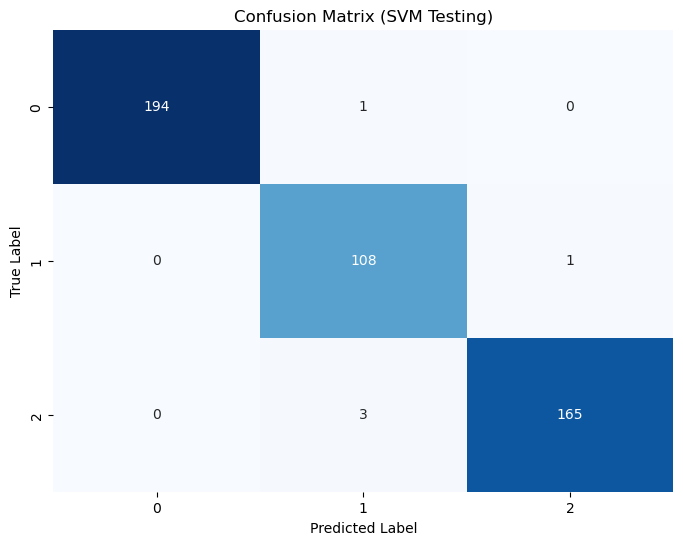

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# get confusion matrix
cm = confusion_matrix(y_test_df,predictions)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (SVM Testing)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.show()

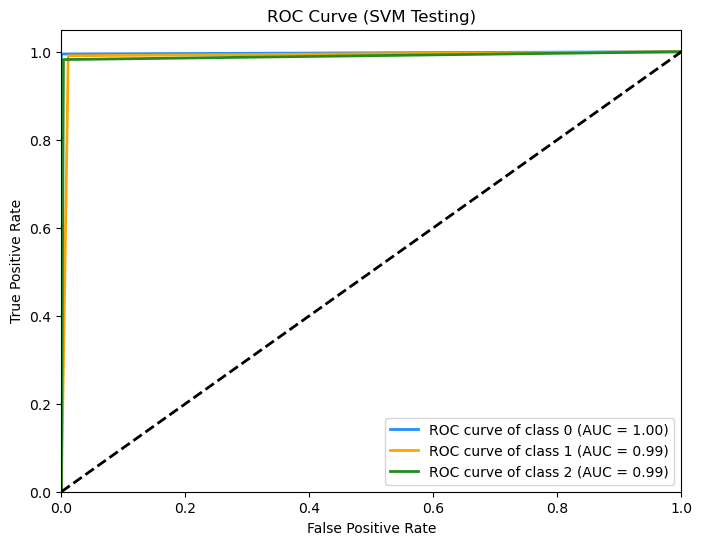

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle


# code reference: https://ai.stackexchange.com/questions/42091/roc-curve-for-multiclassification-results-sound-not-correct    
# https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem
# create roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test_df))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_df == i, predictions == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot
plt.figure(figsize=(8, 6))
colors = cycle(['dodgerblue', 'orange', 'forestgreen'])  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM Testing)')
plt.legend(loc='lower right')
plt.show()

# Test MLP model

In [5]:
# Define the best parameters from the grid search
best_params = {'hidden_size1': 70, 'hidden_size2': 90, 'learning_rate': 0.01, 'weight_decay': 0.001}

# define the mlp model
class contraceptiveNN(nn.Module):
    def __init__(self, hidden1,hidden2): # constructor method for contructiveNN class with hidden neuron sizes as params
        super(contraceptiveNN, self).__init__() # constructor method for parent class to initialize
        self.fc1 = nn.Linear(9, hidden1) # fully connected linear layer, takes 9 inputs
        self.fc2 = nn.Linear(hidden1, hidden2)  # second fully connected linear layer
        self.fc3 = nn.Linear(hidden2, 3) # third linear layer
        self.relu = nn.ReLU() # rectified linear unit activation function
        self.softmax = nn.Softmax(dim=1) # softmax layer for classification task

    # implement forward pass    
    def forward(self, x):
        x = self.fc1(x) # applies first fully connected linear layer to input x
        x = self.relu(x) # applies relu activation function to output of fc1
        x = self.fc2(x) # applies fc2  to x
        x = self.relu(x) # apply relu activation function
        x = self.fc3(x) # apply fc3 to x
        x = self.softmax(x)  # apply softmax
        return x # returns output
    
# load the MLP model
model = contraceptiveNN(hidden1=best_params['hidden_size1'], hidden2=best_params['hidden_size2'])
model.load_state_dict(torch.load('final_mlp_model.pth'))
model.eval()

# load the test data
x_test_df_csv = pd.read_csv('mlp_x_test.csv')
y_test_df_csv = pd.read_csv('mlp_y_test.csv')

# convert to numpy arrays
x_test_array = x_test_df_csv.values
y_test_array = y_test_df_csv.values

# convert to tensors
x_test_tensor = torch.Tensor(x_test_array)
y_test_tensor = torch.Tensor(y_test_array)

# make predictions on the test data
with torch.no_grad():
    predictions = model(x_test_tensor)

# convert to labels
predicted_labels = torch.argmax(predictions, dim=1)

# get accuracy
accuracy = accuracy_score(y_test_tensor, predicted_labels.numpy())

# convert to numpy array for report
actual_labels = y_test_tensor.numpy()

# convert to numpy array for report
predicted_labels = predicted_labels.numpy()

# get classification report
report = classification_report(actual_labels, predicted_labels)

print("Classification Report:\n", report)
print("Accuracy on Test Data:", accuracy)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.70      0.72       195
         1.0       0.59      0.47      0.52       109
         2.0       0.60      0.71      0.65       168

    accuracy                           0.65       472
   macro avg       0.64      0.63      0.63       472
weighted avg       0.65      0.65      0.65       472

Accuracy on Test Data: 0.6504237288135594


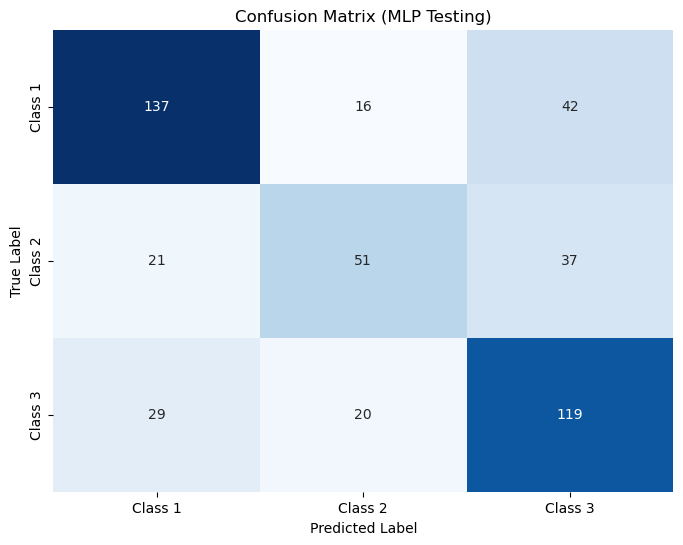

In [6]:
#y_pred_class = np.argmax(y_pred_np, axis=1)

# create confusion matrix for testing
cm = confusion_matrix(actual_labels, predicted_labels)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP Testing)')
plt.show()

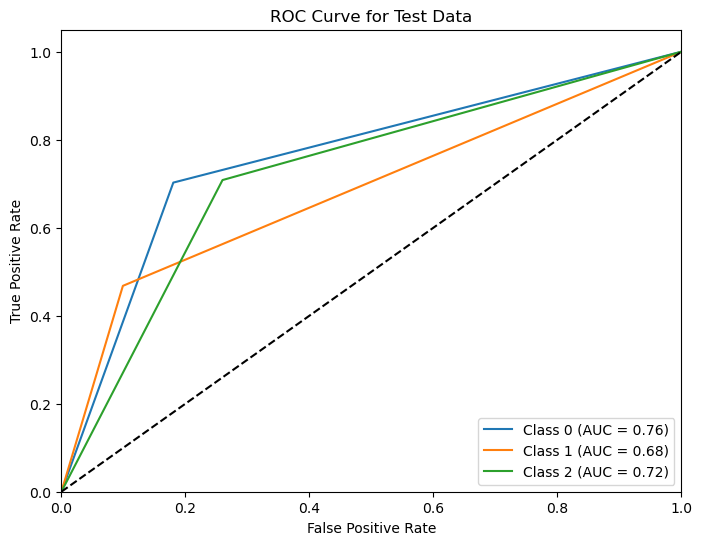

In [7]:
# code reference: https://ai.stackexchange.com/questions/42091/roc-curve-for-multiclassification-results-sound-not-correct    
# https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem
# get roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3): 
    fpr[i], tpr[i], _ = roc_curve(actual_labels == i, predicted_labels == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot roc curve
plt.figure(figsize=(8, 6))
for i in range(3): 
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc="lower right")
plt.show()